In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

results_file = 'dataset/henry.immune.h5ad'

adata = sc.read_h5ad(results_file)

scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


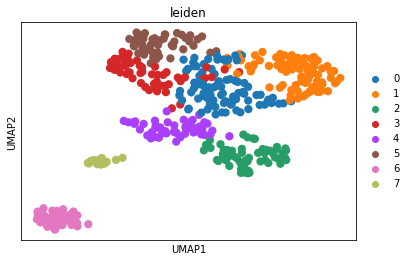

In [5]:
sc.pl.umap(adata, color ='leiden')

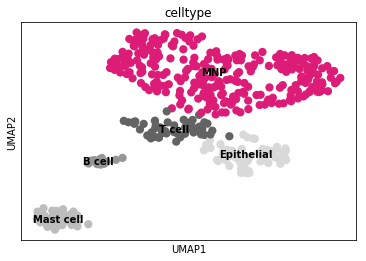

In [11]:
celltype_dict = {'0':'MNP', '1':'MNP', '2':'Epithelial', '3':'MNP', '4':'T cell', '5':'MNP', '6':'Mast cell', '7':'B cell'}
adata.obs['celltype'] = [celltype_dict[l] for l in adata.obs['leiden']]
adata.obs['celltype'] = adata.obs['celltype'].astype('category')
adata.obs['celltype'].cat.reorder_categories(['MNP', 'T cell', 'B cell', 'Mast cell', 'Epithelial'], inplace=True)
sc.pl.umap(adata, color ='celltype', palette = ['#dd1c77', '#636363', '#969696', '#bdbdbd', '#d9d9d9'], legend_loc ='on data')

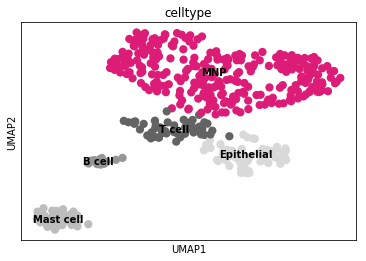

In [12]:
sc.pl.umap(adata, color ='celltype', palette = ['#dd1c77', '#636363', '#969696', '#bdbdbd', '#d9d9d9'], legend_loc ='on data', save = '/henry_immune.pdf')

In [14]:
adata.write(results_file, compression = 'gzip')